## MBKMUN001- ML CNN Image Classification

### Preprocessing

In [50]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.metrics import confusion_matrix,accuracy_score, precision_score, recall_score, f1_score

In [51]:
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = Image.open(os.path.join(folder, filename))
        if img is not None:
            images.append(np.array(img))
    return images
X = []
y = []
Dataset = '/home/nathan/Documents/EEE4114F/MBKMUN001_ML_Project/Dataset'
for i, folder_name in enumerate(os.listdir(Dataset)):
    folder_path = os.path.join(Dataset, folder_name)
    images = load_images_from_folder(folder_path)
    X.extend(images)
    y.extend([i] * len(images))
X = np.array(X)
y = np.array(y)

### Model Training and evaluation

In [52]:
print(X.shape)
print(y.shape)
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert labels to one-hot encoding
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Create CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(5, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

# Make predictions
y_pred = np.argmax(model.predict(X_test), axis=-1)

(375, 28, 28, 3)
(375,)
Epoch 1/20
10/10 [==============================] - 0s 21ms/step - loss: 68.9233 - accuracy: 0.1633 - val_loss: 25.7333 - val_accuracy: 0.1333
Epoch 2/20
10/10 [==============================] - 0s 10ms/step - loss: 12.9519 - accuracy: 0.2300 - val_loss: 6.4919 - val_accuracy: 0.2933
Epoch 3/20
10/10 [==============================] - 0s 10ms/step - loss: 3.3271 - accuracy: 0.3267 - val_loss: 1.6977 - val_accuracy: 0.3600
Epoch 4/20
10/10 [==============================] - 0s 9ms/step - loss: 1.3783 - accuracy: 0.4267 - val_loss: 1.2558 - val_accuracy: 0.5200
Epoch 5/20
10/10 [==============================] - 0s 10ms/step - loss: 1.1885 - accuracy: 0.5167 - val_loss: 1.3267 - val_accuracy: 0.3200
Epoch 6/20
10/10 [==============================] - 0s 10ms/step - loss: 1.2007 - accuracy: 0.4733 - val_loss: 1.1126 - val_accuracy: 0.5867
Epoch 7/20
10/10 [==============================] - 0s 10ms/step - loss: 0.9755 - accuracy: 0.5933 - val_loss: 0.8634 - val_accu

### Accuracy

In [53]:
accuracy = accuracy_score(np.argmax(y_test, axis=-1), y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9066666666666666


### Precision, Recall, F1

In [54]:
precision = precision_score(np.argmax(y_test, axis=-1), y_pred, average='weighted')
recall = recall_score(np.argmax(y_test, axis=-1), y_pred, average='weighted')
f1 = f1_score(np.argmax(y_test, axis=-1), y_pred, average='weighted')


print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")


Precision: 0.9132731092436976
Recall: 0.9066666666666666
F1-Score: 0.9063377737904991


### Classification Report

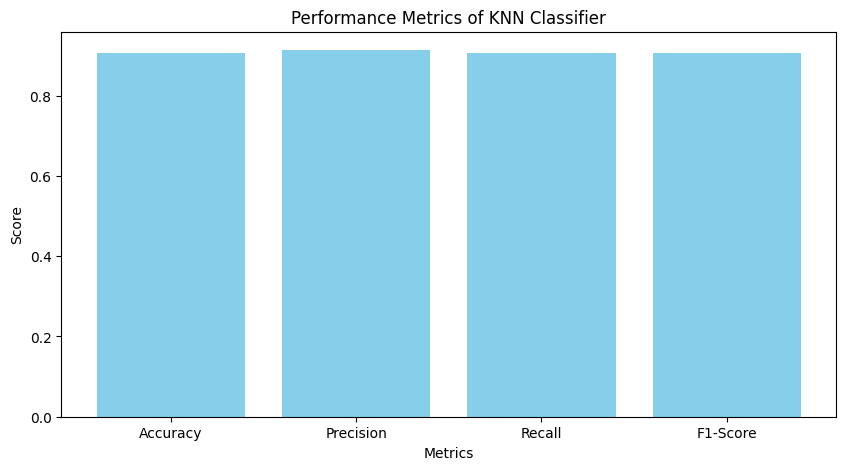

In [55]:
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
values = [accuracy, precision, recall, f1]

plt.figure(figsize=(10, 5))

# Plotting the metrics
plt.bar(metrics, values, color='skyblue')

# Adding labels and title
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.title('Performance Metrics of KNN Classifier')

# Display the plot
plt.show()

### Confusion Matrix

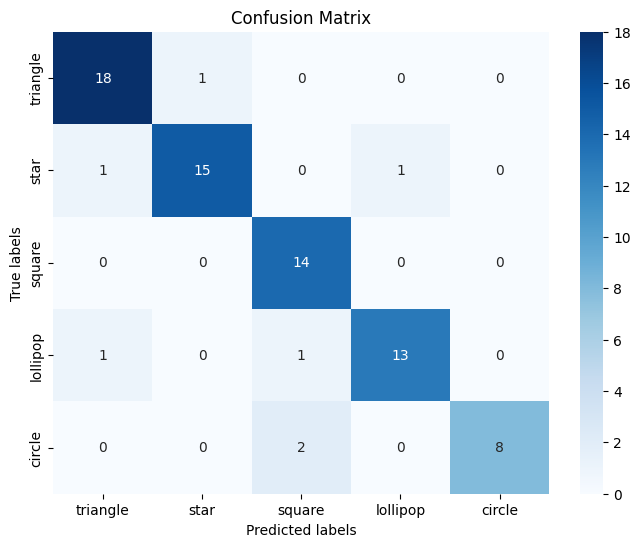

In [56]:
conf_matrix = confusion_matrix(np.argmax(y_test, axis=-1), y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=os.listdir(Dataset), yticklabels=os.listdir(Dataset))
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

### Model Loss

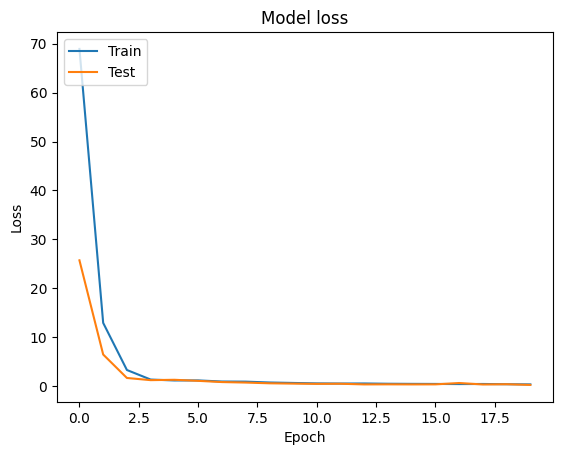

In [57]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
